In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  linear_model
from sklearn.metrics import  mean_squared_log_error as mse
import pickle as pick
from sklearn.feature_selection import  r_regression
from sklearn.feature_selection import SelectKBest

In [2]:
train = pd.read_csv("../EURUSDPrediction/Data/train.csv")
eval = pd.read_csv("../EURUSDPrediction/Data/eval.csv")

In [3]:
train = train.drop(columns=["Unnamed: 0", "Datetime"])

In [4]:
def features_engeeniring (data, train = True):
    """ This function which creates all the necessary sets for the algorithms"""

    df = data.copy()
    # Mean of returns
    # fro Open
    
    df[ "MeanO_5" ] = df[[ "Open" ]].rolling( 5 ).mean()
    df[ "MeanO_15" ] = df[[ "Open" ]].rolling( 15 ).mean()
    df[ "MeanO_24" ] = df[[ "Open" ]].rolling( 24 ).mean()
    df[ "MeanO_31" ] = df[[ "Open" ]].rolling( 31 ).mean()
    
    # For close
    df[ "MeanC_5" ] = df[[ "Close" ]].rolling( 5 ).mean()
    df[ "MeanC_15" ] = df[[ "Close" ]].rolling( 15 ).mean()
    df[ "MeanC_24" ] = df[[ "Close" ]].rolling( 24 ).mean()
    df[ "MeanC_31" ] = df[[ "Close" ]].rolling( 31 ).mean()
    # For high
    
    df[ "MeanH_5" ] = df[[ "High" ]].rolling( 5 ).mean()
    df[ "MeanH_15" ] = df[[ "High" ]].rolling( 15 ).mean()
    df[ "MeanH_24" ] = df[[ "High" ]].rolling( 24 ).mean()
    df[ "MeanH_31" ] = df[[ "High" ]].rolling( 31 ).mean()
    # for Low
    df[ "MeanL_5" ] = df[[ "Low" ]].rolling( 5 ).mean()
    df[ "MeanL_15" ] = df[[ "Low" ]].rolling( 15 ).mean()
    df[ "MeanL_24" ] = df[[ "Low" ]].rolling( 24 ).mean()
    df[ "MeanL_31" ] = df[[ "Low" ]].rolling( 31 ).mean()
    
    # For volume
    """
    df[ "MeanV_5" ] = df[[ "Volume" ]].rolling( 5 ).mean()
    df[ "MeanV_15" ] = df[[ "Volume" ]].rolling( 15 ).mean()
    df[ "MeanV_24" ] = df[[ "Volume" ]].rolling( 24 ).mean()
    df[ "MeanV_31" ] = df[[ "Volume" ]].rolling( 31 ).mean()
    """

    # Volatility
     # fro Open
    
    df[ "stdO_60" ] = df[[ "Open" ]].rolling( 60 ).std()
    df[ "stdO_24" ] = df[[ "Open" ]].rolling( 24 ).std()
    df[ "stdO_100" ] = df[[ "Open" ]].rolling( 100 ).std()
    df[ "stdO_120" ] = df[[ "Open" ]].rolling( 120 ).std()
    # For close
    
    df[ "stdC_24" ] = df[[ "Close" ]].rolling( 24 ).std()
    df[ "stdC_80" ] = df[[ "Close" ]].rolling( 80 ).std()
    df[ "stdC_100" ] = df[[ "Close" ]].rolling( 100 ).std()
    df[ "stdC_120" ] = df[[ "Close" ]].rolling( 120 ).std()
    # For high

    
    df[ "stdH_24" ] = df[[ "High" ]].rolling( 60 ).std()
    df[ "stdH_80" ] = df[[ "High" ]].rolling( 80 ).std()
    df[ "stdH_100" ] = df[[ "High" ]].rolling( 100 ).std()
    df[ "stdH_120" ] = df[[ "High" ]].rolling( 120 ).std()
    # for Low
    
    df[ "stdL_24" ] = df[[ "Low" ]].rolling( 24 ).std()
    df[ "stdL_80" ] = df[[ "Low" ]].rolling( 80 ).std()
    df[ "stdL_100" ] = df[[ "Low" ]].rolling( 100 ).std()
    df[ "stdL_120" ] = df[[ "Low" ]].rolling( 120 ).std()
    # For volume
    """
    df[ "stdV_60" ] = df[[ "Volume" ]].rolling( 30 ).std()
    df[ "stdV_80" ] = df[[ "Volume" ]].rolling( 40 ).std()
    df[ "stdV_100" ] = df[[ "Volume" ]].rolling( 50 ).std()
    df[ "stdV_120" ] = df[[ "Volume" ]].rolling( 60 ).std()
    """
    df["Max"] = df["High"].rolling(window = 10).max().shift(-10)
    df["Min"] = df["Low"].rolling(window = 10).min().shift(-10)
    df['MaxC'] = abs(df['Max'] - df['Close'])
    df['MinC'] = abs(df['Min'] - df['Close'])
    df['Target'] = np.where(df['MaxC'] >= df['MinC'], df['Max'], df['Min'])
    
    # NORMALIZATION 
    # Initialize the class
    
    df = df.dropna()
    target = df["Target"]
    target
    df = df.drop(columns = ["Target","Min", "Max", "Adj Close", "Volume", "Max", "Min", "MaxC","MinC", "Open", "High", "Low"])
    c = df.columns
    sc = StandardScaler()
    X= sc.fit_transform(df)
    # Initiliaze the PCA class
    
    pca = PCA(n_components= 2)
    X = pd.DataFrame(pca.fit_transform(X))
    X.columns = ["abs1", "abs2"]
    
    X = pd.DataFrame(X)
    target = target.reset_index(drop=True)
    return X, target

In [5]:
X,y = features_engeeniring(train)


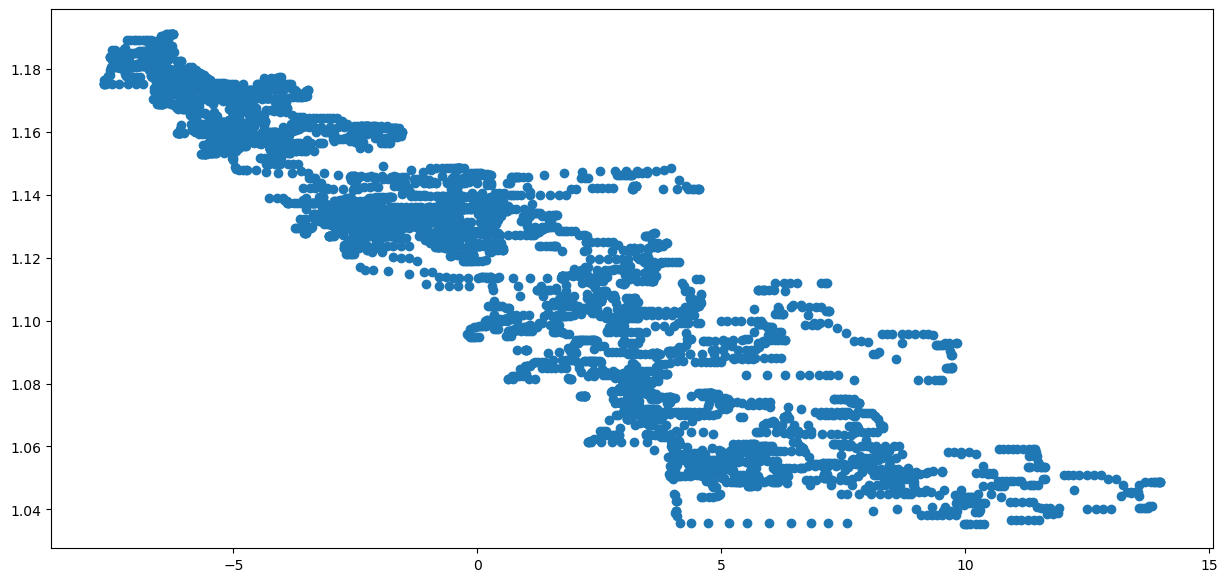

In [16]:
plt.figure(figsize= (15, 7))
plt.scatter(X["abs1"],y)

,Close,MeanO_24,MeanC_24,MeanH_24,MeanL_24,stdO_24,stdC_24,stdH_24,stdL_24,T
Close,1.000000,0.997380,0.997681,0.997535,0.997542,-0.398805,-0.404396,-0.444315,-0.389262,0.985620
MeanO_24,0.997380,1.000000,0.999987,0.999990,0.999989,-0.393588,-0.398965,-0.438258,-0.380880,0.983438
MeanC_24,0.997681,0.999987,1.000000,0.999990,0.999990,-0.393979,-0.399338,-0.438846,-0.381371,0.983714
MeanH_24,0.997535,0.999990,0.999990,1.000000,0.999976,-0.392201,-0.397573,-0.437289,-0.379555,0.983579
MeanL_24,0.997542,0.999989,0.999990,0.999976,1.000000,-0.395600,-0.400957,-0.439874,-0.382949,0.983613
stdO_24,-0.398805,-0.393588,-0.393979,-0.392201,-0.395600,1.000000,0.989230,0.558185,0.987572,-0.412693
stdC_24,-0.404396,-0.398965,-0.399338,-0.397573,-0.400957,0.989230,1.000000,0.540736,0.988127,-0.418327
stdH_24,-0.444315,-0.438258,-0.438846,-0.437289,-0.439874,0.558185,0.540736,1.000000,0.542296,-0.445745
stdL_24,-0.389262,-0.380880,-0.381371,-0.379555,-0.382949,0.987572,0.988127,0.542296,1.000000,-0.403425
T,0.985620,0.983438,0.983714,0.983579,0.983613,-0.412693,-0.418327,-0.445745,-0.403425,1.000000


In [243]:
model = linear_model.LinearRegression()

regressor = model1.fit(X, y)



In [244]:
#test = test.drop(columns=["Unnamed: 0", "Datetime"])
X_test, y_test= features_engeeniring(test)
predictL = []
errors = []
predict = regressor.predict(X_test)


In [200]:
X_test.shape

(4043, 17)

,0,1,2,3
0,-2.914923,-2.824687,-0.165602,-0.864048
1,-2.991213,-3.041248,-0.470164,-0.791787
2,-3.068643,-3.252774,-0.754155,-0.649262
3,-3.132870,-3.435074,-0.828617,-0.374707
4,-3.101864,-3.301971,-0.433468,-0.262749
...,...,...,...,...
4038,-3.701712,0.706164,-0.063992,-1.390492
4039,-3.649653,0.934445,-0.288627,-1.354358
4040,-3.662881,1.008712,-0.697873,-1.263963
4041,-3.731247,0.921738,-1.354798,-1.233761


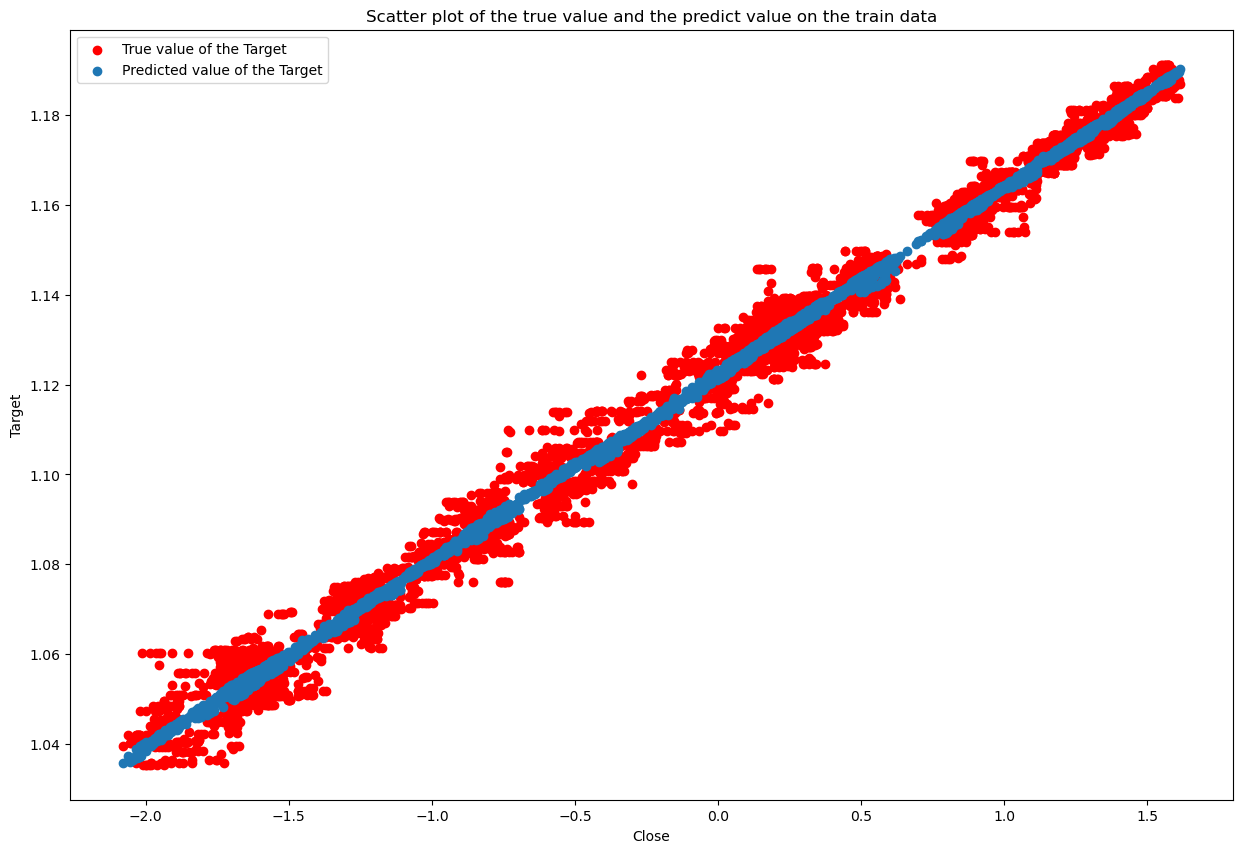

In [245]:
predict_ = regressor.predict(X)
figure = plt.subplots(figsize = (15, 10))
plt.scatter(X["Close"], y, color = "r", label = "True value of the Target") 
plt.scatter(X["Close"], predict_, label = "Predicted value of the Target")
plt.title("Scatter plot of the true value and the predict value on the train data")
plt.xlabel("Close")
plt.ylabel("Target")
plt.legend()

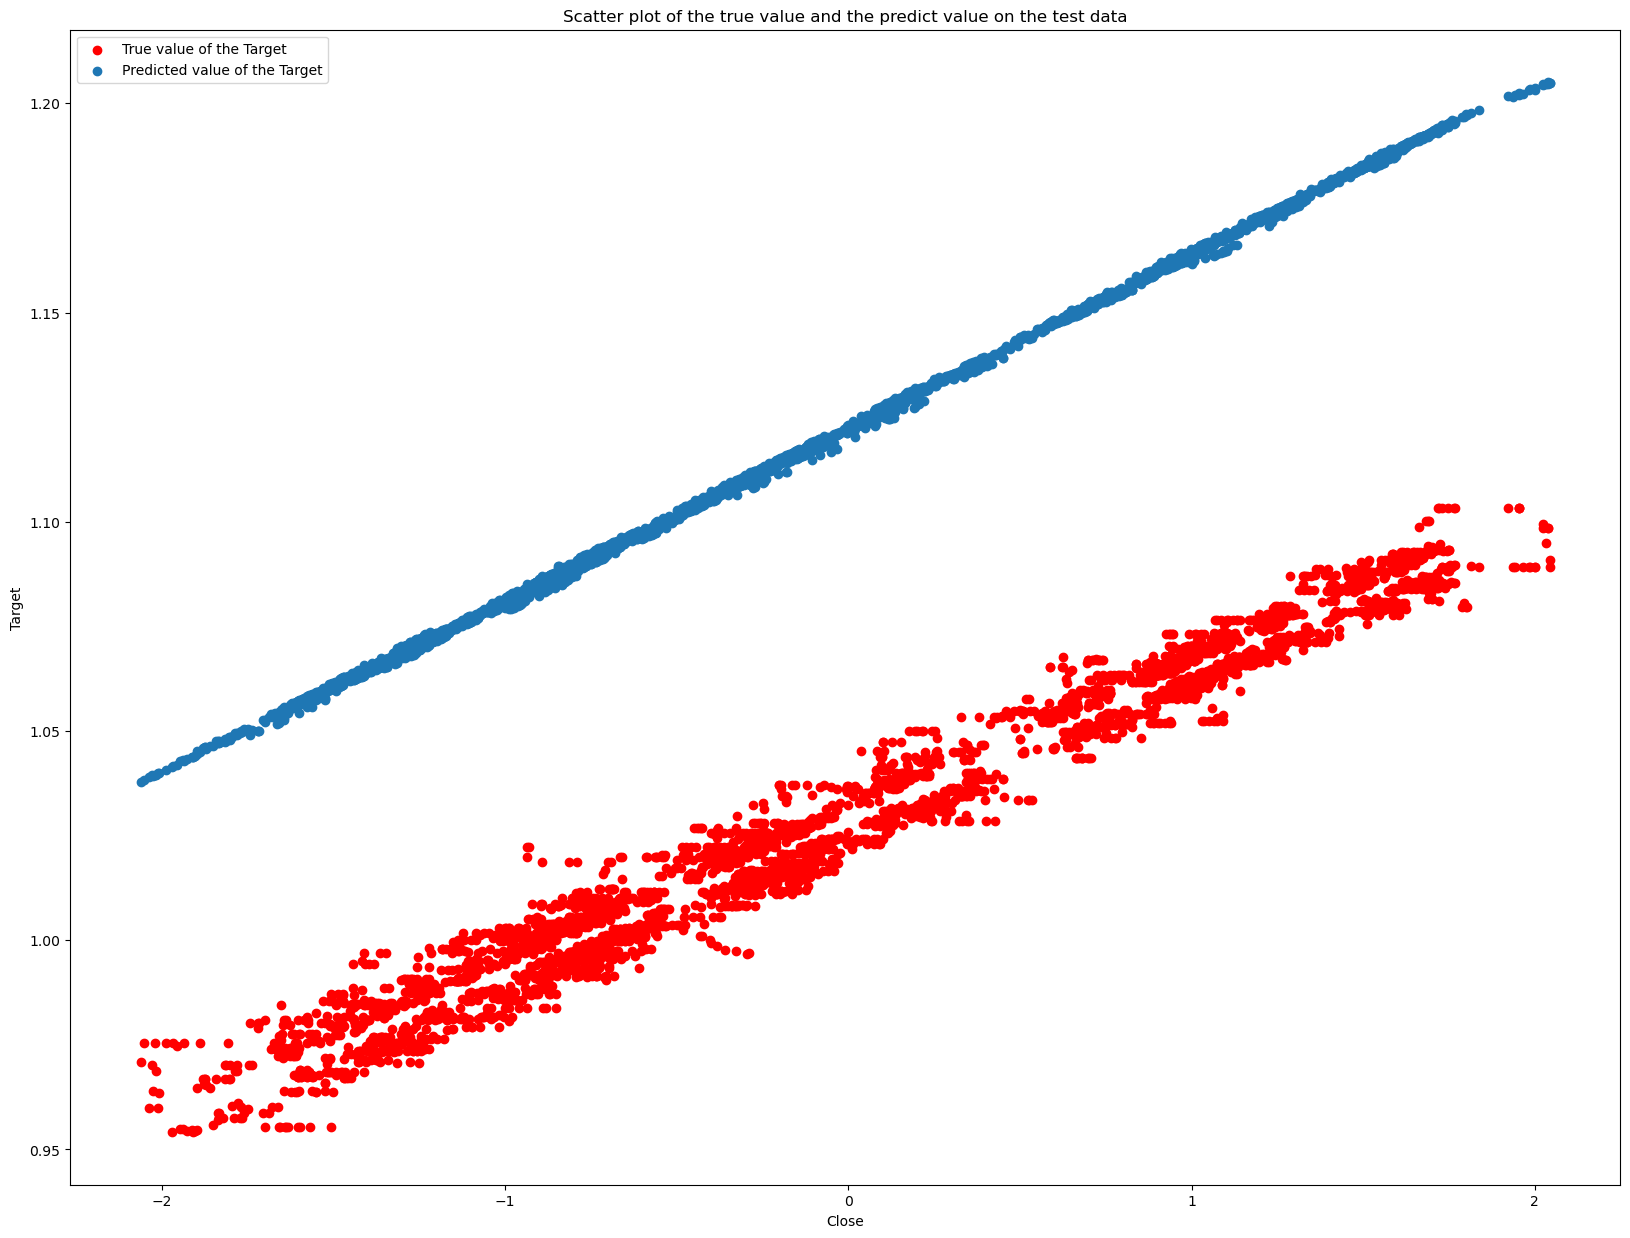

In [246]:
figure = plt.subplots(figsize = (20, 15))
plt.scatter(X_test["Close"], y_test, color = "r",label = "True value of the Target")
plt.scatter(X_test["Close"], predict, label = "Predicted value of the Target")
plt.title("Scatter plot of the true value and the predict value on the test data")
plt.xlabel("Close")
plt.ylabel("Target")
plt.legend()

In [58]:
mse(y_pred=predict, y_true=y_test)

0.0021589958257207456

In [59]:
eval = eval.drop(columns=["Unnamed: 0", "Datetime"])
X_eval, y_eval= features_engeeniring(eval)
predict__ = regressor.predict(X_eval)
mse(y_pred=predict__, y_true=y_eval)

0.0005108568008902015

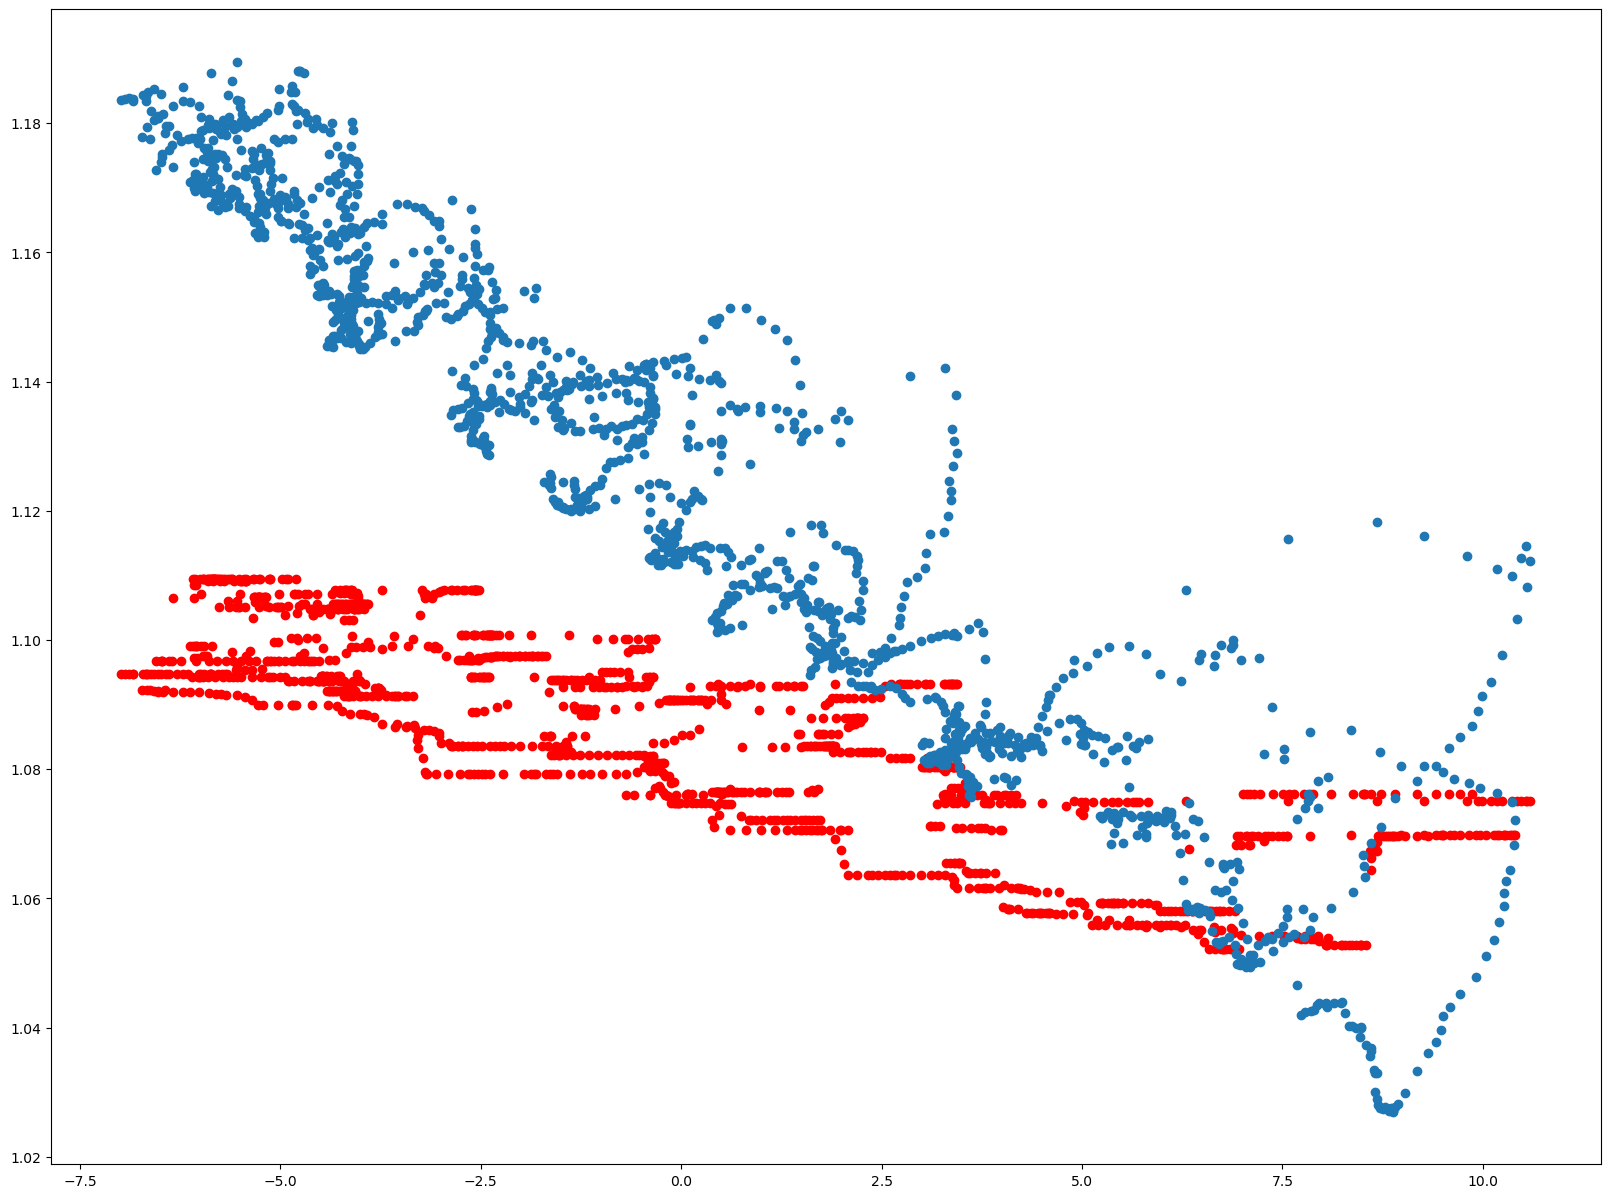

In [60]:
figure = plt.subplots(figsize = (20, 15))
plt.scatter(X_eval["abs1"], y_eval, color = "r")
plt.scatter(X_eval["abs1"], predict__)

In [203]:
v = pd.DataFrame(np.array(np.random.randint(0, 20, (20, 2))), columns=["A", "B"])
v["C"] = v["A"].rolling(5).max().shift(-5)
v

,A,B,C
0,15,13,16.0
1,16,18,14.0
2,7,2,18.0
3,13,17,18.0
4,3,7,18.0
5,10,5,18.0
6,14,8,18.0
7,18,17,17.0
8,2,12,17.0
9,17,14,16.0
